## imports

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
# add titanic directory to python search path for accessing repo
import os
import sys
import math
import pandas as pd
import seaborn as sns
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
repo_path = os.path.abspath(os.path.join('..'))
if repo_path not in sys.path:
    sys.path.append(repo_path)

# imports
from utils import load_data

 ## load data

In [3]:
train_df = load_data('train')
test_df = load_data('test')
df = pd.concat([train_df, test_df]).reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## preprocessing
1. remove unnecessary features
2. missing values
3. binning numeric features
4. categorize

### 1. Remove unnecessary features
We see that the PassengerId feature is redundant and hence remove it from the data.

In [4]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

### 2. Missing values
The features 'Age', 'Fare', 'Cabin' and 'Embarked' contain missing/null values which are imputed with most probable values. For the numerical features 'Age' and 'Fare', the missing values are imputed with the respective mean. For the 'Cabin' feature the decicion was taken to be drop it entirely due to the fact that 77.5 percent of the 'Cabin' data is missing. For the categorical feature 'Embarked', we will impute the missing values with the most frequent category.
For 

<AxesSubplot:>

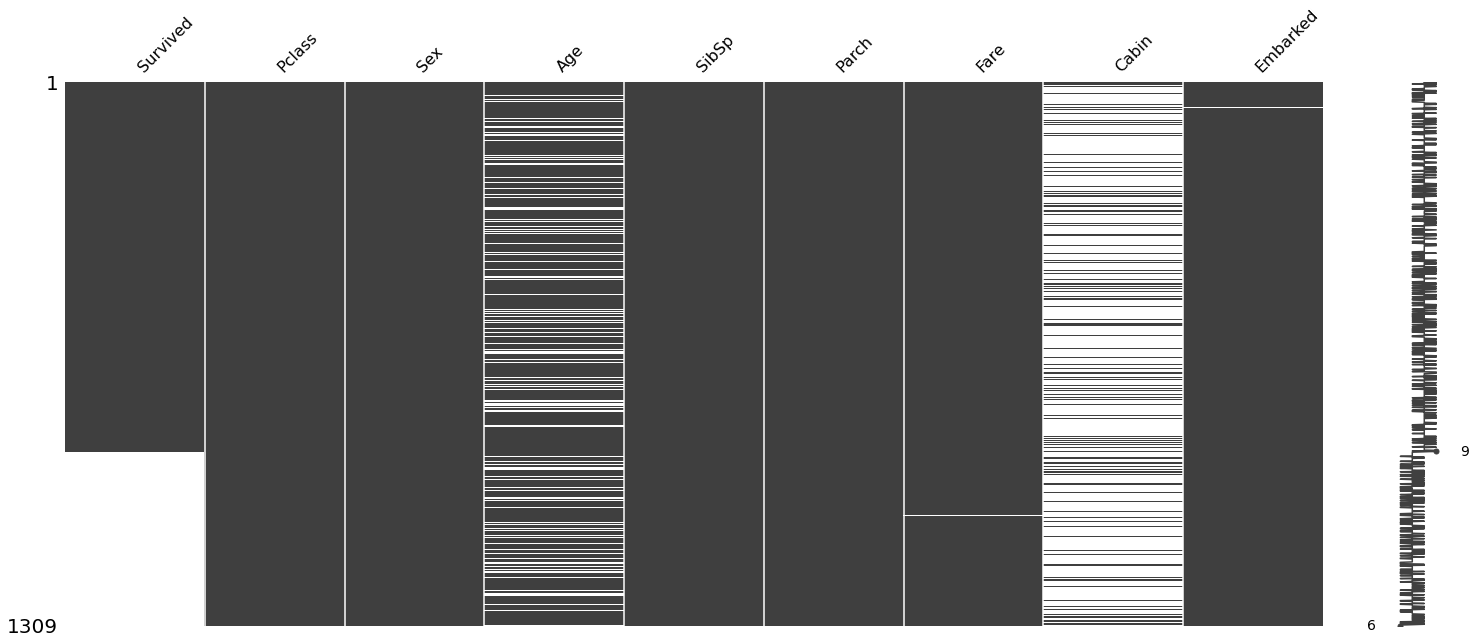

In [5]:
msno.matrix(df)

Feature Age: imputing mean is 29.88
Feature Fare: imputing mean is 33.30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 81.9+ KB


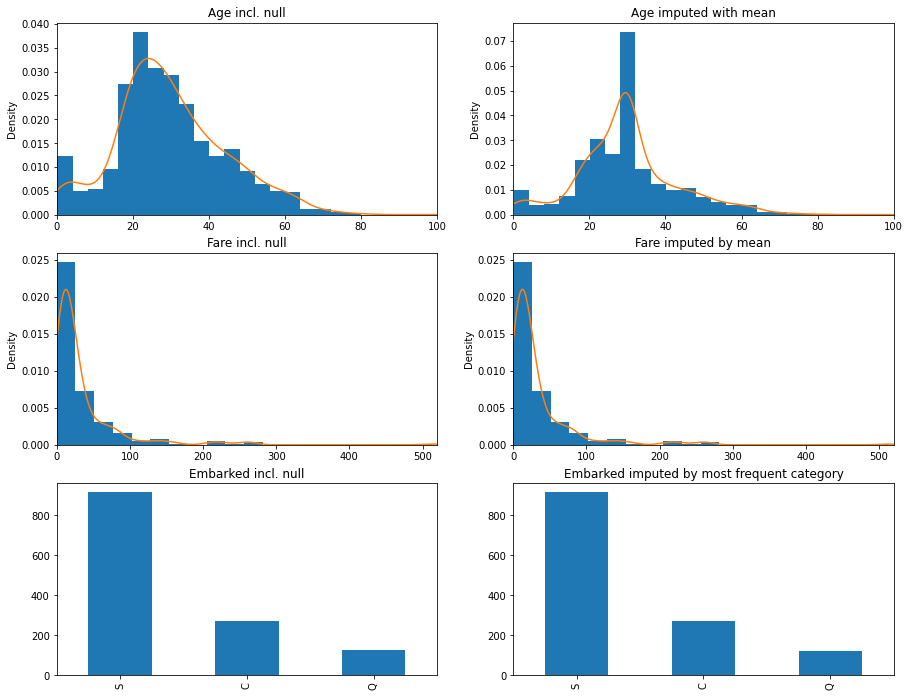

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12))

# Deal with Age
df['Age'].hist(bins=20, ax=axes[0, 0], density=True)
df['Age'].plot.kde(ax=axes[0, 0])
axes[0, 0].set_xlim(0, 100)
axes[0, 0].set_title('Age incl. null')
print(f'Feature Age: imputing mean is {df["Age"].mean():.2f}')
df['Age'].fillna(df['Age'].dropna().mean(), inplace=True)
df['Age'].hist(bins=20, ax=axes[0, 1], density=True)
df['Age'].plot.kde(ax=axes[0, 1])
axes[0, 1].set_xlim(0, 100)
axes[0, 1].set_title('Age imputed with mean')


# Deal with Fare
df['Fare'].hist(bins=20, ax=axes[1, 0], density=True)
df['Fare'].plot.kde(ax=axes[1, 0])
axes[1, 0].set_xlim(0, 520)
axes[1, 0].set_title('Fare incl. null')
print(f'Feature Fare: imputing mean is {df["Fare"].mean():.2f}')
df['Fare'].fillna(df['Fare'].dropna().mean(), inplace=True)
df['Fare'].hist(bins=20, ax=axes[1, 1], density=True)
df['Fare'].plot.kde(ax=axes[1, 1])
axes[1, 1].set_xlim(0, 520)
axes[1, 1].set_title('Fare imputed by mean')

# Deal with Cabin
df = df.drop(columns=['Cabin'])

# Deal with Embarked
df['Embarked'].value_counts().plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title('Embarked incl. null')
embarked_most_freq = df['Embarked'].dropna().value_counts().idxmax()
df['Embarked'].fillna(embarked_most_freq, inplace=True)
df['Embarked'].value_counts().plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title('Embarked imputed by most frequent category')

# check if all missing values were dealt with
df.info()

### 3. Binning Numeric Features

Text(0.5, 1.0, 'Fare categorized')

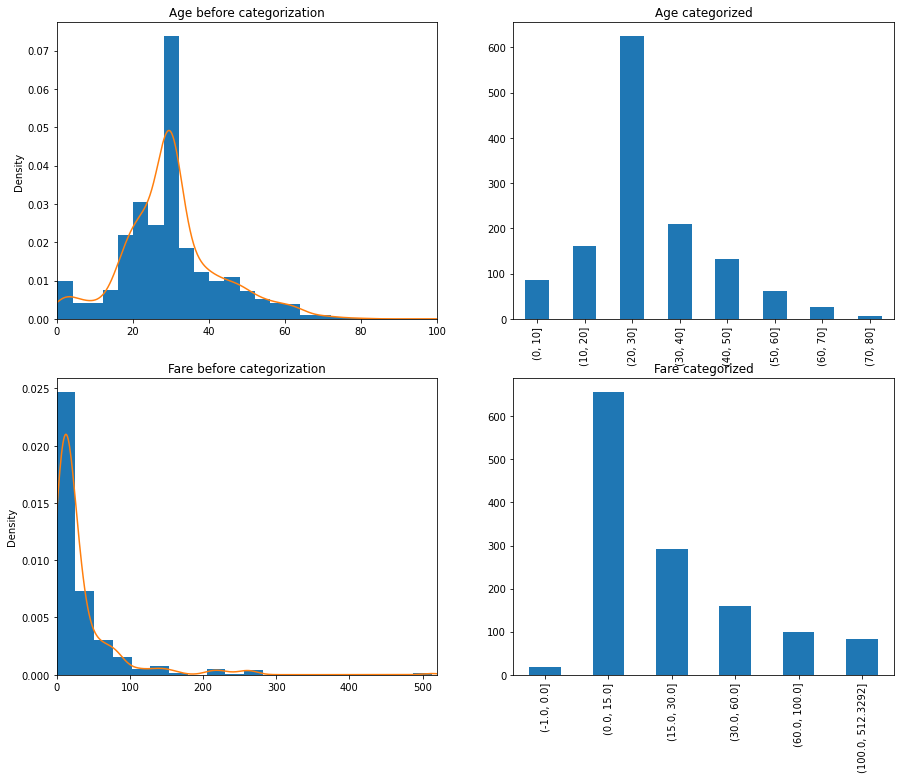

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# age before categorization
df['Age'].hist(bins=20, ax=axes[0, 0], density=True)
df['Age'].plot.kde(ax=axes[0, 0])
axes[0, 0].set_xlim(0, 100)
axes[0, 0].set_title('Age before categorization')

# categorize age
age_bins = pd.interval_range(start=0, end=80, periods=8)
df['Age'] = pd.cut(df['Age'], bins=age_bins)
df['Age'].value_counts(sort=False).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Age categorized')

# fare before categorization
df['Fare'].hist(bins=20, ax=axes[1, 0], density=True)
df['Fare'].plot.kde(ax=axes[1, 0])
axes[1, 0].set_xlim(0, 520)
axes[1, 0].set_title('Fare before categorization')

# categorized fare
fare_bins = pd.DataFrame({"X":[0, 1, 2, 3, 4, 5]},
                         index = pd.IntervalIndex.from_breaks([-1, 0, 15, 30, 60, 100, df["Fare"].max()])).index
df['Fare'] = pd.cut(df['Fare'], bins=fare_bins)
df['Fare'].value_counts(sort=False).plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Fare categorized')

### 4. Catergorize

In [8]:
sex_mapping = {"male": 0, "female": 1}
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
df['Sex'] = df['Sex'].map(sex_mapping)
df['Embarked'] = df['Embarked'].map(embarked_mapping)
age_mapping = {bin: idx for idx, bin in enumerate(age_bins)}
df['Age'] = df['Age'].map(age_mapping)
fare_mapping = {bin: idx for idx, bin in enumerate(fare_bins)}
df['Fare'] = df['Fare'].map(fare_mapping)

## save preprocessed data

In [14]:
data_path = os.path.join(os.path.abspath(os.path.join('')), 'data')
train_path = os.path.join(data_path, 'train_preprocessed.csv')
test_path = os.path.join(data_path, 'test_preprocessed.csv')

train_df = df.iloc[:len(train_df), :]
test_df = df.iloc[len(train_df):, :].reset_index().drop(columns=['index', 'Survived'])

train_df.to_csv(train_path)
test_df.to_csv(test_path)